In [14]:
#import cv2
import json
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#import matplotlib.patches as patches

# we need to append the root directory to the path to import data.py\n",
sys.path.append('..')
import data
import preprocessing
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
params = utils.yaml_to_dict('../config.yml')
params['data_dir'] = os.path.join('..', params['data_dir'])
params['data_dir_lfw'] = os.path.join('..', params['data_dir_lfw'])
params

{'data_dir': '..\\dataset',
 'data_dir_lfw': '..\\dataset\\lfw_data',
 'image_shape': [250, 250],
 'shuffle': True,
 'shuffle_buffer': 4,
 'batch_size': 9,
 'labels_json': 'labels.json'}

In [16]:
train_data_set = data._sources(params)

In [17]:
data_input_fn = data.input_fn(train_data_set, True, params)

In [18]:
data_input_fn

({'image': <tf.Tensor 'IteratorGetNext_1:0' shape=(?, ?, ?, 3) dtype=uint8>},
 <tf.Tensor 'IteratorGetNext_1:1' shape=(?,) dtype=int32>)

In [19]:
with tf.Session() as sess:
    elements = sess.run(data_input_fn)

In [35]:
label_json_path = os.path.join(params['data_dir'], params['labels_json'])
with open(label_json_path, 'r') as file:
    label_dict = json.load(file)
    
labels_json_dict = {k:v for k,v in enumerate(label_dict)}

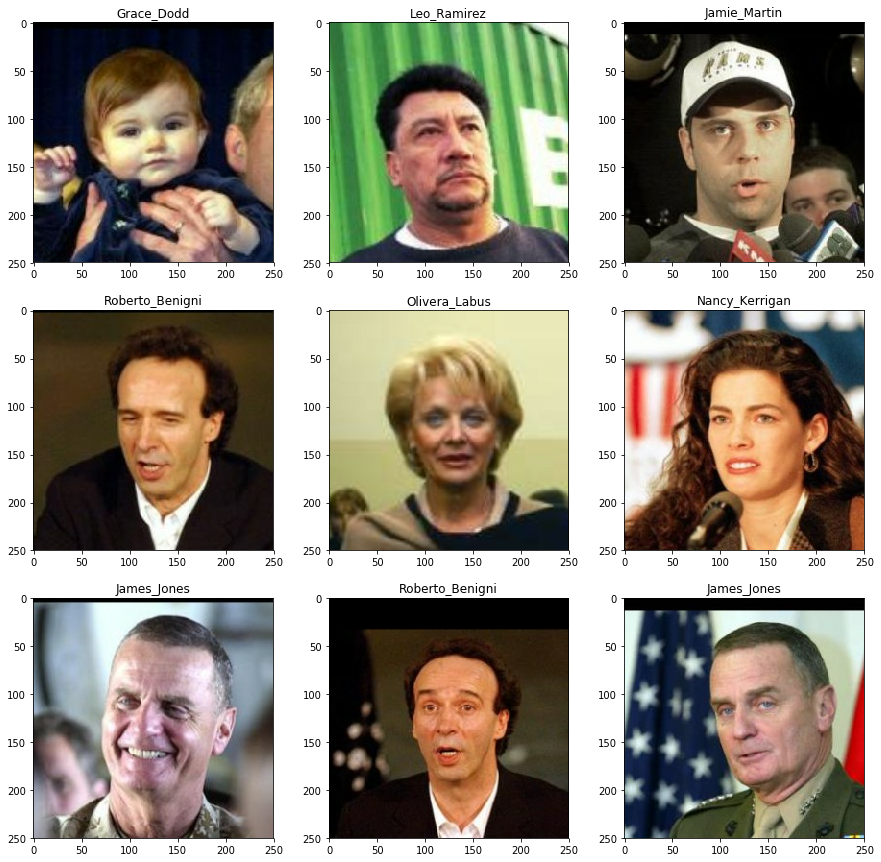

In [37]:
fig, axis = plt.subplots(3,3, figsize=(15,15))
k = 0
for i in range(3):
    for j in range(3):
        img = np.uint8(elements[0]['image'][k])
        title = labels_json_dict[elements[1][k]]
        axis[i][j].set_title('Data')
        axis[i][j].imshow(img)
        axis[i,j].title.set_text(title)
        k += 1
plt.show()